In [573]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

In [574]:
pd.set_option('display.max_columns',None)

In [575]:
df1 = pd.read_excel("Avaliações_Jogos.xlsx")
df2 = pd.read_excel("Categorias_Jogos.xlsx")
df3 = pd.read_excel("Infos_Jogos.xlsx")

In [576]:
df = pd.concat([df1, df2, df3], axis = 1)

DICIONÁRIO DE CADA COLUNA:

index - numbered index

objectid - the identifier on boardgamegeeks.com

name - name of the game #a que deve aparecer nos gráficos

yearpublished - the year the game was published

sortindex - rank of the game on bbg.com #bbg.com não existe?

minplayer - minumum number of players per the publishers 

maxplayers - maximum number of players per the publishers

minplaytime - minimum playtime required per the publishers

maxplaytime - maximum playtime per the publishers

minage - minimum age requiremnet per the publishers

min_community - minimum players per the community 

max_community - max players per the community

totalvotes - total number of community vote 

playerage - minimum age requirement per the community

languagedependence - a rank of amount of in-game text is required during game play #se tem muito ou pouco texto, numa escala numérica

'(no votes)':0,
'Extensive use of text - massive conversion needed to be playable':4,
'Moderate in-game text - needs crib sheet or paste ups':3,
'No necessary in-game text':1,
'Some necessary text - easily memorized or small crib sheet':2,
'Unplayable in another language':5

userrated - number of users that have rated the game

average - user average rating from 1-10

baverage - from the site, determined to be an anti-skewing effort by bgg
with system added mid range ratings (from 1-10)

stddev - average standard deviation of a rating #se o jogo tem um desvio padrão de notas muito alto

avgweight - a complexity rating from 1-5 Weight #complexidade do jogo é um fator importante pois pode traçar perfil de cliente

numweights - number of weight votes

numgeeklists - number of geeks with game on list

numtrading - number of people trading the game  #oferta do jogo

numwanting - number of people wanting the game  #demanda do jogo (acredito que seja um dos mais imporantes)

numcomments - number of comments on the site on this game

siteviews - number of views on the site

numplays - number of times game was played (according to site users?)

numplays_month - number of plays per month

news - number news articles on game

blogs - number of blogs regarding game

weblink - number of weblinks for the game

podcast - number of podcasts on the game #(???)

label - category of game (mostly boardgame)

boardgamedesigner_cnt - count of designers

boardgameartist_cnt - artist count

boardgamepublisher_cnt - publisher count

boardgamehonor_cnt - awards count

boardgamecategory_cnt - category count #acredito que um parâmetro bom seja separar por número de categorias e numero de mecanicas

boardgamemechanic_cnt - game mechanics count

boardgameexpansion_cnt - expansion count

boardgameversion_cnt - version count (languages)

boardgamefamily_cnt - game family count

boardgamedesigner - list of game designers

boardgameartist - list of game artists

boardgamepublisher - list of publishers

boardgamehonor - list of awards

boardgamecategory - list of categories

boardgameversion - list of versions

boardgamemechanic - a list of mechanics

boardgameexpansion - a list of expansions

boardgamefamily - a list of boardgames family

description - full text description of game

gamelink - a link to the game on bgg

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20016 entries, 0 to 20015
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                20016 non-null  int64  
 1   min_community           14149 non-null  float64
 2   max_community           14816 non-null  float64
 3   totalvotes              19920 non-null  float64
 4   playerage               19919 non-null  object 
 5   languagedependence      20016 non-null  int64  
 6   usersrated              19919 non-null  float64
 7   average                 19918 non-null  float64
 8   baverage                19920 non-null  float64
 9   stddev                  20016 non-null  float64
 10  avgweight               20016 non-null  float64
 11  numweights              20016 non-null  int64  
 12  numgeeklists            20016 non-null  int64  
 13  numtrading              20016 non-null  int64  
 14  numwanting              20016 non-null

In [578]:
df.describe()

objectid  min_community  max_community    totalvotes  \
count   20016.000000   14149.000000   14816.000000  19920.000000   
mean    88671.356815       3.203336       4.277740     13.462149   
std     90648.089927       1.398786       2.154951     57.198432   
min         1.000000       1.000000       1.000000      0.000000   
25%      5857.500000       2.000000       3.000000      1.000000   
50%     39284.500000       3.000000       4.000000      3.000000   
75%    169680.500000       4.000000       5.000000      7.000000   
max    295770.000000      31.000000      31.000000   1868.000000   

       languagedependence    usersrated       average      baverage  \
count        20016.000000  19919.000000  19918.000000  19920.000000   
mean             1.354766    740.750038      6.275196      5.297070   
std              1.397114   3101.894657      1.064695      1.495368   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000     47.000000      5.712525      5.502950   
50%              1.000000    105.000000      6.354050      5.545080   
75%              2.000000    334.000000      6.955568      5.675205   
max              5.000000  90730.000000      9.442860      8.584240   

             stddev     avgweight    numweights   numgeeklists    numtrading  \
count  20016.000000  20016.000000  20016.000000   20016.000000  20016.000000   
mean       1.499604      1.931676     48.044265     244.166617     40.102168   
std        0.340845      0.897099    198.045039    1078.734481     94.117323   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        1.309850      1.255250      4.000000      24.000000      4.000000   
50%        1.471530      1.910900      9.000000      59.000000     12.000000   
75%        1.663863      2.500000     25.000000     177.000000     35.000000   
max        4.500000      5.000000   7104.000000  121243.000000   2311.000000   

         numwanting   numcomments     siteviews       numplays  \
count  20016.000000  20016.000000  2.001600e+04   20016.000000   
mean      39.363659    191.489309  7.630316e+04    2304.061651   
std      113.465381    606.767699  2.251689e+05   13621.625923   
min        0.000000      0.000000  1.830000e+02       0.000000   
25%        2.000000     21.000000  1.163275e+04      55.000000   
50%        8.000000     44.000000  2.365400e+04     177.000000   
75%       26.000000    122.000000  5.786500e+04     703.000000   
max     2068.000000  17143.000000  8.933078e+06  627501.000000   

       numplays_month          news         blogs       weblink       podcast  \
count    20016.000000  20016.000000  20016.000000  20016.000000  20016.000000   
mean        16.017386      0.518285     10.146882      6.254247      1.942896   
std        111.335380      1.283211     38.765771     11.052996      7.953819   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      1.000000      0.000000   
50%          0.000000      0.000000      1.000000      3.000000      0.000000   
75%          3.000000      1.000000      6.000000      7.000000      1.000000   
max       5694.000000     30.000000   1158.000000    212.000000    577.000000   

            objectid  boardgamedesigner_cnt  boardgameartist_cnt  \
count   20016.000000           20016.000000         20016.000000   
mean    88671.356815               1.338979             1.379097   
std     90648.089927               0.786757             4.767245   
min         1.000000               0.000000             0.000000   
25%      5857.500000               1.000000             0.000000   
50%     39284.500000               1.000000             1.000000   
75%    169680.500000               2.000000             2.000000   
max    295770.000000              21.000000           508.000000   

       boardgamepublisher_cnt  boardgamehonor_cnt  boardgamecategory_cnt  \
count            20016.0

LIMPEZA: 
- Duplicatas: existem jogos com nomes iguais, porém não devem existir jogos com o mesmo "gamelink" e "sortindex".

Obs: "objectid" contém 3 números repetidos após a limpeza do "sortindex", porém representam jogos diferentes.

In [579]:
a=df[df.duplicated(subset='sortindex', keep=False)]
a["sortindex"].value_counts()                           #quantos valores se repetem em'sortindex'

sortindex
974      2
2965     2
3338     2
4742     2
7154     2
10436    2
10470    2
12141    2
13419    2
14342    2
14819    2
16638    2
17325    2
18938    2
19087    2
19937    2
Name: count, dtype: int64

In [580]:
df.drop_duplicates(subset='gamelink', inplace=True)  #APAGANDO DUPLICATAS

- Irrelevante: coluna "Label" apenas possui um valor.

In [581]:
df['label'].nunique() #qnts valores diferentes tem em "label"

1

In [582]:
df.drop(columns='label', inplace=True)    #APAGANDO COLUNA IRRELEVANTE

-Nulos: 

In [583]:
df.isnull().sum().head(9)

objectid                 0
min_community         5859
max_community         5197
totalvotes              96
playerage               97
languagedependence       0
usersrated              97
average                 97
baverage                96
dtype: int64

In [584]:
df[df['usersrated'].isnull()].head()

objectid  min_community  max_community  totalvotes playerage  \
353     171668            4.0            5.0       142.0        10   
437     271896            3.0            4.0        80.0        10   
479     216734            2.0            4.0        44.0         8   
681     171669            3.0            4.0        63.0        10   
1254      8098            5.0            8.0       105.0         6   

      languagedependence  usersrated  average  baverage   stddev  avgweight  \
353                    2         NaN  7.23252   7.01356  1.25886     1.9200   
437                    4         NaN  7.79597   6.92466  1.37628     2.4592   
479                    3         NaN  7.75384   6.87890  1.52580     2.0588   
681                    1         NaN  7.11733   6.70614  1.13213     2.3697   
1254                   1         NaN  6.52259   6.34343  1.51281     1.1417   

      numweights  numgeeklists  numtrading  numwanting  numcomments  \
353          275          1997         492         358         2042   
437           98           314          42         439          530   
479           51           357         100         232          770   
681          165          1375         247         193          844   
1254         628          1727         245          74         2094   

      siteviews  numplays  numplays_month  news  blogs  weblink  podcast  \
353      526373     46614             173     5    173       39       55   
437      403456      6479             357     1     28        8       11   
479      265538     11067             119     1     25        8        8   
681      266721     11328              42     5     78       43       20   
1254     479865     41583             181     4     31       58       11   

      objectid  boardgamedesigner_cnt  boardgameartist_cnt  \
353     171668                      2                    1   
437     271896                      2                   49   
479     216734                      2                    1   
681     171669                      1                    1   
1254      8098                      2                    3   

      boardgamepublisher_cnt  boardgamehonor_cnt  boardgamecategory_cnt  \
353                        9                   7                      2   
437                        8                   0                      5   
479                        2                   0                      4   
681                        4                   1                      2   
1254                      27                   2                      4   

      boardgamemechanic_cnt  boardgameexpansion_cnt  boardgameversion_cnt  \
353                       5                       1                    13   
437                       5                       0                     9   
479                       4                       2                     3   
681                       4                       0                     7   
1254                      1                       2                    52   

      boardgamefamily_cnt                            boardgamedesigner  \
353                     1       ['Fabien Riffaud"', 'Juan Rodriguez"']   
437                     2         ['Corey Konieczka"', 'Tony Fanchi"']   
479                     2      ['Nate Chatellier"', 'Manny Trembley"']   
681                     2                ['C\\u00e9drick Chaboussit"']   
1254                    1  ['Thomas Vuarchex"', 'Pierrick Yakovenko"']   

                                        boardgameartist  \
353                                         ['Tignous']   
437   ['Borja Pindado Arribas', 'Balaskas', 'Tiziano...   
479                                  ['Manny Trembley']   
681                                 ['Vincent Dutrait']   
1254  ['Franz Vohwinkel', 'Thomas Vuarchex', 'Pierri...   

                                     boardgamepublisher  \
353   ['Sweet Games', 'BoardM Factory', 'CMON Limite...   
437   ['Fantasy Fligh

- Outliers:

In [585]:
df.describe()

objectid  min_community  max_community    totalvotes  \
count   20000.000000   14141.000000   14803.000000  19904.000000   
mean    88670.822200       3.203522       4.277917     13.464480   
std     90649.972355       1.398935       2.155624     57.215368   
min         1.000000       1.000000       1.000000      0.000000   
25%      5858.750000       2.000000       3.000000      1.000000   
50%     39278.500000       3.000000       4.000000      3.000000   
75%    169698.750000       4.000000       5.000000      7.000000   
max    295770.000000      31.000000      31.000000   1868.000000   

       languagedependence    usersrated       average      baverage  \
count         20000.00000  19903.000000  19903.000000  19904.000000   
mean              1.35465    740.719389      6.275235      5.297634   
std               1.39713   3102.350251      1.064903      1.494510   
min               0.00000      0.000000      0.000000      0.000000   
25%               0.00000     47.000000      5.712550      5.502980   
50%               1.00000    105.000000      6.354030      5.545145   
75%               2.00000    334.000000      6.955685      5.675205   
max               5.00000  90730.000000      9.442860      8.584240   

             stddev     avgweight    numweights   numgeeklists    numtrading  \
count  20000.000000  20000.000000  20000.000000   20000.000000  20000.000000   
mean       1.499691      1.931761     48.059050     244.243000     40.097900   
std        0.340743      0.897206    198.113638    1079.125263     94.094807   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        1.309920      1.255050      4.000000      24.000000      4.000000   
50%        1.471575      1.910900      9.000000      59.000000     12.000000   
75%        1.663782      2.500000     25.000000     178.000000     35.000000   
max        4.500000      5.000000   7104.000000  121243.000000   2311.000000   

         numwanting   numcomments     siteviews       numplays  \
count  20000.000000  20000.000000  2.000000e+04   20000.000000   
mean      39.376050    191.515100  7.632353e+04    2304.163050   
std      113.503485    606.892077  2.252393e+05   13625.576506   
min        0.000000      0.000000  1.830000e+02       0.000000   
25%        2.000000     21.000000  1.163450e+04      55.000000   
50%        8.000000     44.000000  2.366050e+04     177.000000   
75%       26.000000    122.000000  5.791975e+04     703.250000   
max     2068.000000  17143.000000  8.933078e+06  627501.000000   

       numplays_month          news         blogs       weblink       podcast  \
count    20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean        16.018050      0.518000     10.146900      6.255150      1.943050   
std        111.374578      1.282754     38.772952     11.053866      7.956222   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      1.000000      0.000000   
50%          0.000000      0.000000      1.000000      3.000000      0.000000   
75%          3.000000      1.000000      6.000000      7.000000      1.000000   
max       5694.000000     30.000000   1158.000000    212.000000    577.000000   

            objectid  boardgamedesigner_cnt  boardgameartist_cnt  \
count   20000.000000           20000.000000         20000.000000   
mean    88670.822200               1.339200             1.379250   
std     90649.972355               0.787003             4.768926   
min         1.000000               0.000000             0.000000   
25%      5858.750000               1.000000             0.000000   
50%     39278.500000               1.000000             1.000000   
75%    169698.750000               2.000000             2.000000   
max    295770.000000              21.000000           508.000000   

       boardgamepublisher_cnt  boardgamehonor_cnt  boardgamecategory_cnt  \
count            20000.0

In [586]:
#df.loc[df['totalvotes'] > 1000, ['totalvotes','name']]

In [587]:
#deletadar = df[df.yearpublished <= 0].index #Pegando o index das pessoas com idade negativa
#df.drop(deletadar, inplace=True)

OBSERVAÇÕES SOBRE A LIMPEZA DE DADOS:
- Não entendemos a diferença entre min/max community e min/max players. Não representam o mesmo valor e parece que, oficialmente, número a ser considerado de máximo e mínimo de jogadores é o min/max players (feito pelo publisher do jogo). Outro fator que nos leva a tomar esse valor com análise é o alto número de informações faltando nas colunas max e min community (2023 e 1649)  <-- *ACHO Q TAVA ERRADO ESSES VALORES, ARRUMEI*
- Alguns outliers, olhando apenas para a tabela, nos pareceram bizarros como jogos criados 3500 antes de cristo e coisas do tipo. Por hora, construiremos alguns gráficos para entender se essas informações comprometem ou não a análise como um todo.
- Muitos jogos, como mostrado logo acima, apresentam poucos votos totais. Como um numero baixo de votos torna o desvio padrão muito alto e portanto uma avaliação pouco precisa de nota, faremos, inicialmente, um gráfico para entender a relação entre quantos votos cada jogo recebeu, e, a partir disso, estabelecer um piso para se avaliar características dos jogos em função a média de avaliações, objetivo central e principal da análise (saber se uma característica de um jogo é ou não relacionada com sua avaliação)

ANÁLISES BÁSICAS SOBRE OS JOGOS: Entendendo o comportamento e distribuição de jogos na tabela

Nesta primeira parte, achei interessante classificar os jogos somente por fatores externos aos próprios jogos, como datas de lançamentos, avaliações, demandas, num de comentários ou coisas que não dizem respeito aos jogos em si para entender a influência destes fatores na popularidade dos jogos.

Mais para frente, analisaremos as características dentro do jogo

In [588]:
lancado = df[['yearpublished']]
lancado = lancado.value_counts()
lancado = lancado.sort_index(ascending=False)
lancado = lancado.iloc[0:100]
ano = list(range(2022,1922,-1))

fig=px.bar(x=ano, y=lancado)
fig.update_layout(
    title='Lançamentos de jogos nos últimos 100 anos',
    xaxis=dict(title='anos'),
    yaxis=dict(title='quantidade'))
fig.show()

In [589]:
df_filtered = df[df['yearpublished'] >= 1950]
total_jogos = len(df)
total_jogos_desde_1950 = len(df_filtered)
porcentagem_desde_1950 = (total_jogos_desde_1950 / total_jogos) * 100
fig = px.pie(
    names=['Publicados desde 1950', 'Antes de 1950'],
    values=[porcentagem_desde_1950, 100 - porcentagem_desde_1950],
    title='Porcentagem de Jogos Publicados a Partir de 1950',
)
fig.show()

A partir do exposto acima, tomamos nocão que quase todos os jogos (98% de 20000 = 19593) são lançados após 1950 e que portanto é descartável se preocupar com jogos muito antigos, perdendo menos de 2% das informações presentes na base.


In [590]:
fig = px.scatter(
    df,
    x='usersrated',
    y='average',
    hover_name='name',
    title='Número de Avaliações vs. Avaliação Média',
    labels={'userrated': 'Número de Avaliações', 'average': 'Avaliação Média'},  
)

# Exibir o gráfico
fig.show()

O breve insight obtido aqui é que, em geral, jogos com MUITAS avaliações apresntam notas razoáveis, e, portanto, ter muitas avaliações é um ponto positivo, uma vez que a reta de regressão linear é crescente e também indica popularidade do jogo.
Entretanto, não ficou claro o que está acontecendo em jogos com baixas avaliações.

In [591]:
count_per_ratings = df['usersrated'].value_counts().sort_index()

fig = px.bar(
    x=count_per_ratings.index,
    y=count_per_ratings.values,
    labels={'x': 'Número de Avaliações', 'y': 'Quantidade de Jogos'},
    title='Quantidade de Jogos por Número de Avaliações',
     range_x=[0, 300], 
)

fig.show()

INSIGHT!

É notória a quebra de padrão entre jogos com menos de 30 avaliações e mais de 30 avaliações, então os próximos gráficos vão comparar isto

obs do renan: (Nada me leva a crer que isso não foi proposital de quem organizou, e deve ter uns 10 easter eggs do tipo espalhado pela tabela)

In [592]:
df_0_30_reviews = df[df['usersrated'].between(0, 30)]
df_30_60_reviews = df[df['usersrated'].between(31, 60)]
df_60_plus_reviews = df[df['usersrated'] > 60]

total_jogos_0_30 = len(df_0_30_reviews)
total_jogos_30_60 = len(df_30_60_reviews)
total_jogos_60_plus = len(df_60_plus_reviews)

porcentagem_0_30 = (total_jogos_0_30 / total_jogos) * 100
porcentagem_30_60 = (total_jogos_30_60 / total_jogos) * 100
porcentagem_60_plus = (total_jogos_60_plus / total_jogos) * 100

fig = px.pie(
    names=['0-30 Avaliações', '30-60 Avaliações', '60+ Avaliações'],
    values=[porcentagem_0_30, porcentagem_30_60, porcentagem_60_plus],
    title='Porcentagem de Jogos por Intervalo de Avaliações',
    hole=0.4
)

fig.update_layout(
    width=600,
    height=500
)

fig.show()


In [593]:
df_less_than_30_reviews = df[df['usersrated'] < 30]
df_more_than_30_reviews = df[df['usersrated'] >=30]

media_stddev_less_than_30 = df_less_than_30_reviews['stddev'].mean()
media_stddev_more_than_30 = df_more_than_30_reviews['stddev'].mean()

fig = px.bar(
    x=['Menos de 30 Avaliações', '30 ou mais Avaliações'],
    y=[media_stddev_less_than_30, media_stddev_more_than_30],
    labels={'x': 'Número de Avaliações', 'y': 'Média do Desvio Padrão'},
    title='Média do Desvio Padrão entre Jogos com Menos e Mais de 30 Avaliações'
)
fig.update_yaxes(range=[1, 1.8])
fig.show()

bins = [0, 2, 10, 20, 40, 60, 100, 150, float('inf')]
labels = ['0-1','2-9', '10-19', '20-39', '40-59', '60-99', '100-149', '150+']

df['evaluation_range'] = pd.cut(df['usersrated'], bins=bins, labels=labels, right=False)

# Calcular a média do desvio padrão em cada categoria
df_grouped = df.groupby('evaluation_range')['stddev'].mean().reset_index()

# Criar um gráfico de barras
fig2 = px.bar(
    df_grouped,
    x='evaluation_range',
    y='stddev',
    title='Média do Desvio Padrão por Intervalo de Avaliações',
    labels={'stddev': 'Média do Desvio Padrão', 'evaluation_range': 'Intervalo de Avaliações'},
)
fig2.update_yaxes(range=[1.4, 1.6])
# Exibir o gráfico
fig2.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_18040\761882220.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



INSIGHT!!!

Analisando de imediato, surpreendentemente, parece jogos que apresentam menos de 30 avaliações NÃO apresentam desvio padrão de notas alto (na verdade, apresentam média de desvio padrão menor que os jogos com mais de 30 avaliações). Entretanto, analisando o segundo gráfico, vemos que isso se deve aos jogos que apresentam somente 1 voto e portanto desvio padrão nulo e, na verdade, a faixa de jogos entre 10 e 60 avaliações apresentam maior desvio padrão que jogos com 60 avaliações ou mais.


In [594]:

fig_scatter = px.scatter(
    df,
    x='numwanting',
    y='average',
    title='Demanda vs. Avaliação Média',
    labels={'numwanting': 'Número de Pessoas Querendo', 'average': 'Avaliação Média'},
)
fig_scatter.show()

In [595]:
# Criei uma coluna para categorizar as faixas de avaliação
df['faixa_avaliacao'] = pd.cut(df['average'], bins=[0, 4, 5, 6, 7, 8, 9, 10], labels=['0-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])
# média de demanda por intervalo 
media_demanda_por_faixa = df.groupby('faixa_avaliacao')['numwanting'].mean().reset_index()
fig = px.bar(
    media_demanda_por_faixa,
    x='faixa_avaliacao',
    y='numwanting',
    title='Média de Demanda por Jogo, por Nota Média',
    labels={'faixa_avaliacao': 'Faixa de Nota', 'numwanting': 'Média de Demanda'},
)
fig.show()


df['faixa_avaliacao'] = pd.cut(df['average'], bins=[0, 4, 5, 6, 7, 8, 9, 10], labels=['0-4', '4-5', '4-6', '6-7', '7-8', '8-9', '9-10'])

# Calcular o número total de avaliações para cada faixa de avaliação
total_avaliacoes_por_faixa = df.groupby('faixa_avaliacao')['usersrated'].mean().reset_index()

# Criar o gráfico de barras
fig1 = px.bar(
    total_avaliacoes_por_faixa,
    x='faixa_avaliacao',
    y='usersrated',
    title='Número Médio de Avaliações por Jogo, por Nota média',
    labels={'faixa_avaliacao': 'Faixa de nota', 'usersrated': 'Número Médio de Avaliações'},
)

# Exibir o gráfico
fig1.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_18040\3078167849.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\arthu\AppData\Local\Temp\ipykernel_18040\3078167849.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



INSIGHTS!!

Primeiramente, há uma relação clara entre demanda e faixa de nota, (oras, a demanda cresce conforme a média de nota aumenta! Todos querem o jogo mais legal). Mas então, por quê a demanda para jogos com nota acima de 9 é tão menor??

Bom, analisando o segundo gráfico, vemos que o número médio de avaliações realizadas para jogos com média maior que 9 (69.45 avaliações) é muito menor que para jogos entre 7 e 9 (1880 avaliações). Frente a isso, visto o baixo número de avaliações, podemos concluir que são jogos -potencialmente- novos e, acima de tudo, pouco conhecidos no mercado. Isto, então, acende um alerta uma campanha de marketing direcionada a jogos recentes que já apresentam notas médias acima de 9 e não apresentam demanda clara, uma vez que esta ausência é fruto de ignorância e não desinteresse.

Seguindo então nessa linha, para validar nessa teoria, vamos acompanhar a demanda de jogos do útlimos anos e o número de avaliações atreladas a jogos mais recentes.

In [596]:
colors = ['#8A2BE2', '#FA8072']
df_before_2017 = df[df['yearpublished'] <= 2017]
df_after_2017 = df[df['yearpublished'] > 2017]

average_demand_before_2017 = df_before_2017['numwanting'].mean()
average_demand_after_2017 = df_after_2017['numwanting'].mean()

data_demand = {
    'Ano': ['Até 2017', 'Depois de 2017'],
    'Média de Demandas': [average_demand_before_2017, average_demand_after_2017]
}

df_demand = pd.DataFrame(data_demand)

fig_demand = px.pie(
    df_demand,
    names='Ano',
    values='Média de Demandas',
    title='Média de Demandas para Jogos Publicados Antes e Depois de 2017',
    labels={'Média de Demandas': 'Média de Demandas'},
    color_discrete_sequence=colors,
)

df_high_rating = df[df['average'] > 9]

df_high_rating['Ano'] = df_high_rating['yearpublished'].apply(lambda x: 'Antes de 2017' if x <= 2017 else 'Depois de 2017')

count_high_rating = df_high_rating.groupby('Ano').size().reset_index(name='Quantidade')

fig_high_rating = px.pie(
    count_high_rating,
    names='Ano',
    values='Quantidade',
    title='Quantidade de Jogos com Nota Maior que 9 Lançados Antes e Depois de 2017',
    labels={'Quantidade': 'Número de Jogos'},
    color_discrete_sequence=colors,
)
fig_high_rating.update_layout(
    width=710,
    height=500
)

fig_high_rating.show()

fig_demand.update_layout(
    width=710,
    height=500
)

fig_demand.show()

df['Ano'] = df['yearpublished'].apply(lambda x: 'Depois de 2017' if x > 2017 else 'Antes de 2017')


count_by_year = df.groupby('Ano').size().reset_index(name='Quantidade')

colors = ['#FA8072','#8A2BE2']
fig = px.pie(
    count_by_year,
    names='Ano',
    values='Quantidade',
    title='Número de Jogos Lançados Antes e Depois 2017',
    labels={'Quantidade': 'Número de Jogos'},
    color_discrete_sequence=colors,
)

fig.update_layout(
    width=710,
    height=500
)

fig.show()


C:\Users\arthu\AppData\Local\Temp\ipykernel_18040\2013204164.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bingo! O primeiro gráfico mostra exatamente o previsto pelo dito anteriomente "-potencialmente- novo", e que mostra que 80% (16) dos jogos com nota maior que 9 surgiram nos últimos 5 anos (considerando a base de dados contendo informações relevantes até 2021), e portanto apresentam pouca demanda pois não são conhecidos ainda.

É fundamental também perceber que, apesar de somente 9.88% dos jogos terem sido lançados nos ultimos 5 anos, eles representam 59% da demanda atual. Portanto, é explcíto a preferência do público pelos jogos mais recentes.

In [597]:
popularidade = df[['usersrated', 'average', 'numtrading', 'numwanting',
       'numcomments', 'siteviews', 'numplays', 'blogs', 'podcast']]

jogo = df[['usersrated', 'average', 'boardgamedesigner_cnt', 'boardgameartist_cnt', 'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt']]

dados = df[['usersrated', 'average', 'yearpublished', 'sortindex', 'minplayers', 'maxplayers', 'minplaytime', 'maxplaytime', 'avgweight']]

<Axes: >

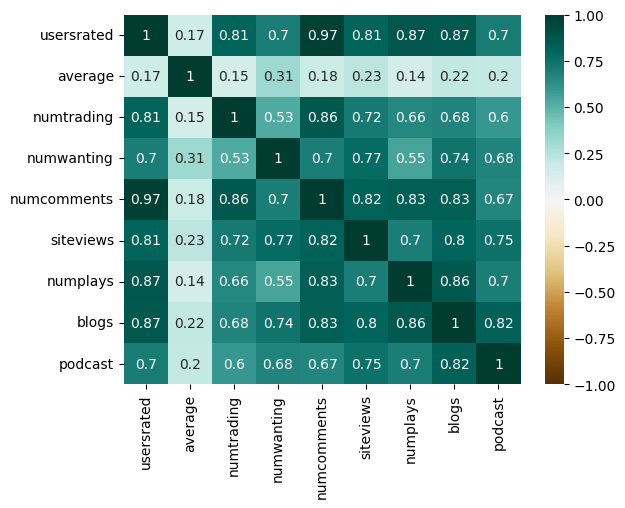

In [598]:
sns.heatmap(popularidade.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG')

A partir do heatmap acima, podemos tomar noção de algumas relações importantes:

- De modo geral, há relações muito claras da POPULARIDADE DE UM JOGO (numplays, blogs, numcomments, siteviews, numwanting) com o número de avaliações que ele recebeu (usersrated), visto que a primeira linha apresenta uma média de relações muito alta e o heatmap como um todo está muito 'quente'

- Entretanto, verifica-se que, pela segunda linha, a nota de um jogo (average) não está diretamente relacionada com sua popularidade, ou seja, jogos bem ou mal avaliados podem ser populares, com quase a mesma frequência. É perceprtível o quanto a segunda linha e coluna distoam do resto do heat map

- Outro ponto válido de se ressaltar é que não há uma relação tão satisfatória entre oferta e demanda (0.53)


<Axes: >

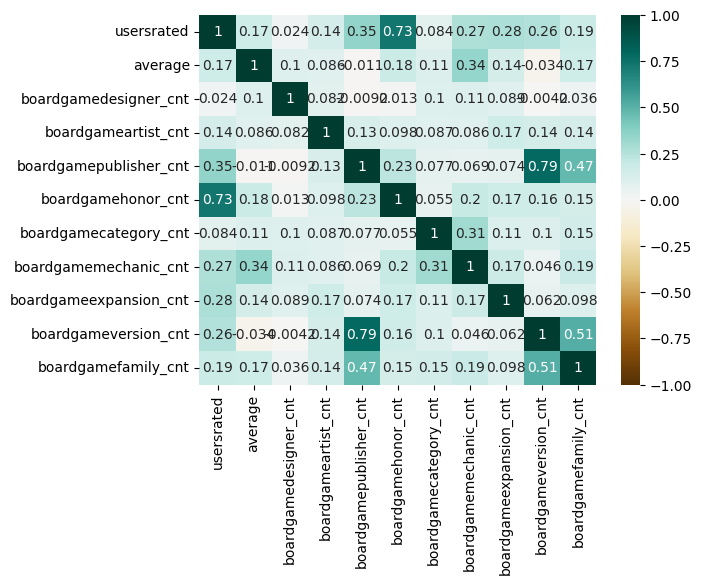

In [599]:
sns.heatmap(jogo.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')   

A primeira coisa que salta aos olhos por este heatmap é a boa relação entre quantidade de prêmios recebidos pelo jogo (boardgamehonor_cnt) com o a quantidade de avaliações que, pelo heatmap superior, pode ser relacionado com a popularidade do jogo.

Sem surpresa, também faz sentido um jogo que possui alto número de publishers possuir alto número de versões diferentes.

Trazendo a disussão agora para relações desarmônicas, temos a ausência de relações entre número de avaliações de quantidade de categorias que um jogo se enquadra. 

Verifica-se também a baixa relação com o número de designers do jogo com o resto das colunas. #Talvez a relação fique mais clara quando analisemos QUAIS designers fizeram cada jogo.

<Axes: >

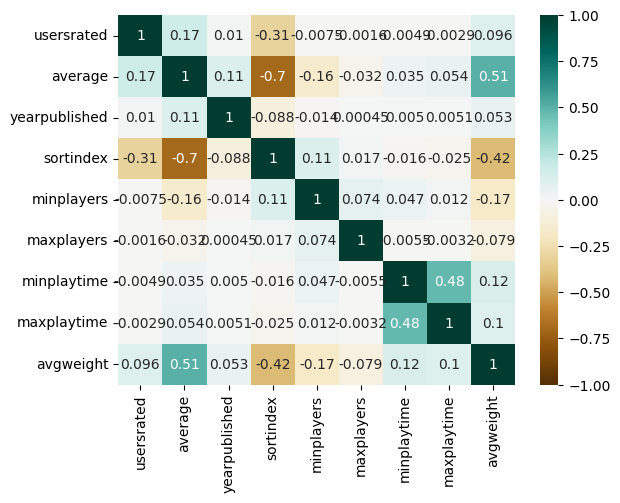

In [600]:
sns.heatmap(dados.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')   

Não vejo insights relevantes


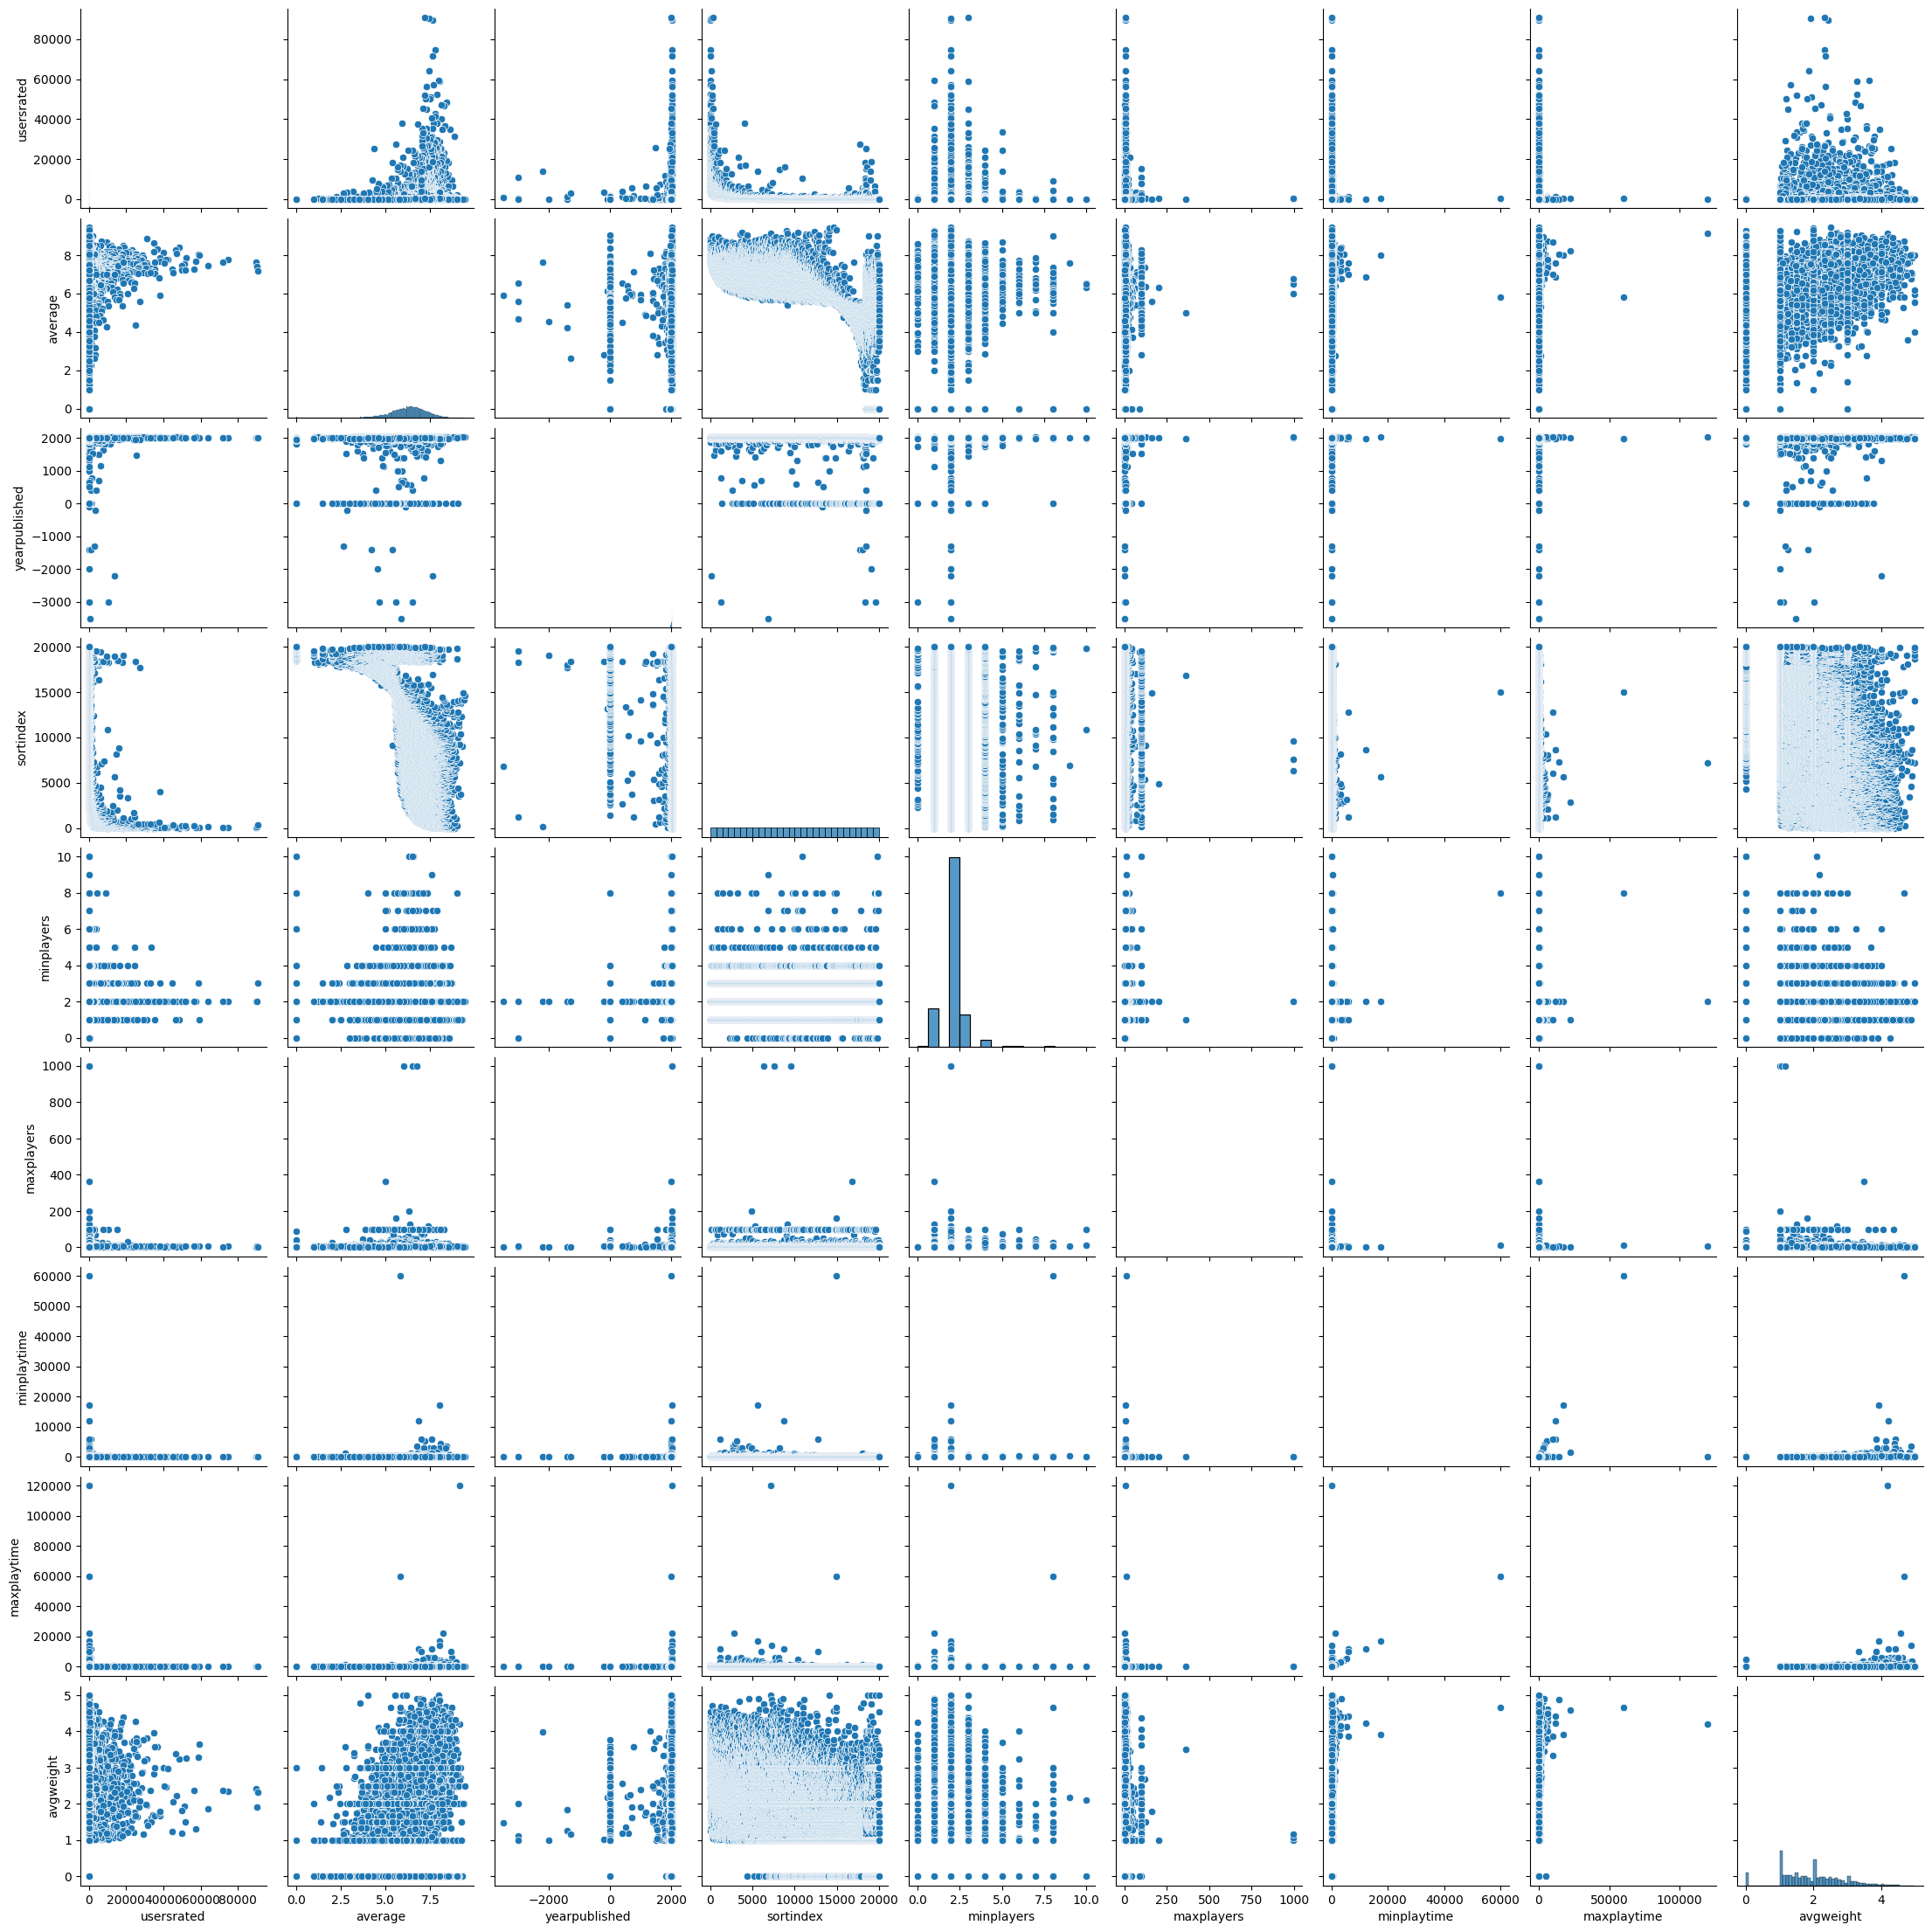

In [601]:
sns.pairplot(dados)

este pairplot não apresenta distribuições normais na diagonal principal e muito menos gráficos com padrões identificáveis. 

O único gráfico relevante que, já era esperado que fosse fazer sentido, é o gráfico de usersrated pelo sortindex, que segue uma função do tipo y = k/x.

Interpretação prejudicada.

In [602]:
ml  = df['boardgamecategory']   #MUDA O NOME AQUI QUE DA BOM
ml  = df['boardgamecategory'].str.split(',').explode().str.strip('[]')

In [603]:
cont = ml.value_counts()
ml = ml[ml.isin(cont.index[cont >= 300])]

In [604]:
ml = pd.get_dummies(ml).astype(int).groupby(ml.index).sum()
ml

'Card Game'   'Childrens Game'   'Deduction'   'Dice'   'Economic'  \
0                 0                  0             0        0            0   
2                 0                  0             0        0            0   
3                 0                  0             0        0            1   
4                 0                  0             0        0            0   
5                 0                  0             0        0            1   
...             ...                ...           ...      ...          ...   
19995             0                  0             0        0            0   
19996             0                  0             0        0            0   
19997             0                  1             0        0            0   
19998             0                  1             0        0            0   
19999             0                  0             0        0            0   

        'Educational'   'Exploration'   'Fantasy'   'Fighting'   'Horror'  \
0                   0               1           1            1          0   
2                   0               0           0            0          0   
3                   0               0           0            0          0   
4                   0               0           0            0          0   
5                   0               0           0            0          0   
...               ...             ...         ...          ...        ...   
19995               0               0           0            0          0   
19996               0               0           0            0          0   
19997               0               0           0            0          0   
19998               0               0           0            0          0   
19999               0               0           0            0          0   

        'Humor'   'Medieval'   'Memory'   'Miniatures'  \
0             0            0          0              1   
2             0            0          0              0   
3             0            0          0              0   
4             0            0          0              0   
5             0            0          0              0   
...         ...          ...        ...            ...   
19995         0            0          0              0   
19996         0            0          0              0   
19997         0            0          0              0   
19998         0            0          0              0   
19999         0            0          0              0   

        'Movies / TV / Radio theme'   'Murder/Mystery'   'Nautical'  \
0                                 0                  0            0   
2                                 0                  0            0   
3                                 0                  0            0   
4                                 0                  0            0   
5                                 0                  0            0   
...                             ...                ...          ...   
19995                             0                  0            0   
19996                             0                  0            0   
19997                             0                  0            0   
19998                             0                  0            0   
19999                             0                  0            0   

        'Negotiation'   'Novel-based'   'Party Game'   'Political'  \
0                   0               0              0             0   
2                   0               0              0             0   
3                   0               0              0             0   
4                   0               0              0             0   
5                   1               0              0             1   
...               ...             ...            ...           ...   
19995               1               0              0             0   
19996               0               

In [605]:
renan = ml[['Card Game',	'Childrens Game',	'Deduction',	'Dice',	'Economic',	'Educational',	'Exploration',	'Fantasy',	'Fighting',	'Horror',	'Humor',	'Medieval',	'Memory',	'Miniatures']]
sns.heatmap(renan.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')  #NAO CONSEGUI

KeyError: "None of [Index(['Card Game', 'Childrens Game', 'Deduction', 'Dice', 'Economic',\n       'Educational', 'Exploration', 'Fantasy', 'Fighting', 'Horror', 'Humor',\n       'Medieval', 'Memory', 'Miniatures'],\n      dtype='object')] are in the [columns]"

In [ ]:
pca = PCA(n_components = 2).fit_transform(ml)

In [ ]:
k_range = range(1,12)
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

c:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [ ]:
centroids = [X.cluster_centers_ for X in k_means_var]
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [ ]:
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

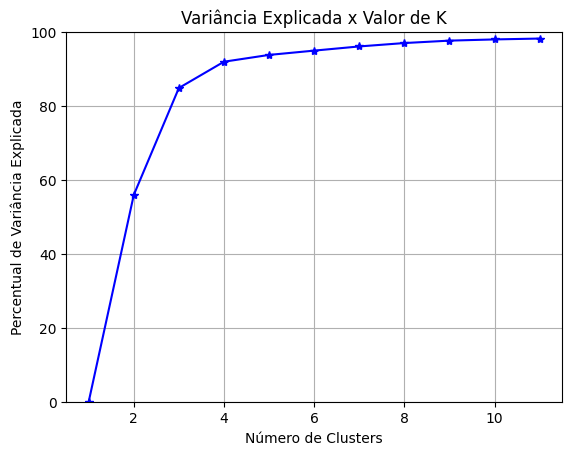

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [ ]:
modelo_v1 = KMeans(n_clusters = 6)
modelo_v1.fit(pca)

c:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6)

In [ ]:
#x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
#y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
#xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
#Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

In [ ]:
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_

# Configurar o gráfico de dispersão
fig = go.Figure()

# Adicionar pontos aos dados transformados pelo PCA
fig.add_trace(go.Scatter(x=pca[:, 0], y=pca[:, 1], mode='markers', marker=dict(color='black', size=4), name='Pontos'))

# Adicionar centróides com cruzes vermelhas
fig.add_trace(go.Scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(color='red', size=10, symbol='x'), name='Centróides'))

# Configurar o layout do gráfico
fig.update_layout(
    xaxis=dict(range=[pca[:, 0].min(), pca[:, 0].max()], showticklabels=False),
    yaxis=dict(range=[pca[:, 1].min(), pca[:, 1].max()], showticklabels=False),
    showlegend=True,
    title="Gráfico de Dispersão com Centróides"
)

# Exibir o gráfico
fig.show()

In [ ]:
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6330815550290497

In [ ]:
cluster_map = pd.DataFrame(ml)
cluster_map['cluster'] = modelo_v1.labels_
cluster_map.head()

'Card Game'   'Childrens Game'   'Deduction'   'Dice'   'Economic'  \
0             0                  0             0        0            0   
2             0                  0             0        0            0   
3             0                  0             0        0            1   
4             0                  0             0        0            0   
5             0                  0             0        0            1   

    'Educational'   'Exploration'   'Fantasy'   'Fighting'   'Horror'  \
0               0               1           1            1          0   
2               0               0           0            0          0   
3               0               0           0            0          0   
4               0               0           0            0          0   
5               0               0           0            0          0   

    'Humor'   'Medieval'   'Memory'   'Miniatures'  \
0         0            0          0              1   
2         0            0          0              0   
3         0            0          0              0   
4         0            0          0              0   
5         0            0          0              0   

    'Movies / TV / Radio theme'   'Murder/Mystery'   'Nautical'  \
0                             0                  0            0   
2                             0                  0            0   
3                             0                  0            0   
4                             0                  0            0   
5                             0                  0            0   

    'Negotiation'   'Novel-based'   'Party Game'   'Political'  \
0               0               0              0             0   
2               0               0              0             0   
3               0               0              0             0   
4               0               0              0             0   
5               1               0              0             1   

    'Print & Play'   'Puzzle'   'Racing'   'Real-time'   'Science Fiction'  \
0                0          0          0             0                   0   
2                0          0          0             0                   1   
3                0          0          0             0                   0   
4                0          0          0             0                   0   
5                0          0          0             0                   1   

    'Sports'   'Territory Building'   'Transportation'   'Trivia'   'Wargame'  \
0          0                      0                  0          0           0   
2          0                      1                  0          0           0   
3          0                      0                  0          0           0   
4          0                      0                  1          0           0   
5          0                      0                  0          0           0   

    'Word Game'   'World War II'  'Abstract Strategy'  'Action / Dexterity'  \
0             0                0                    0                     0   
2             0                0                    0                     0   
3             0                0                    0                     0   
4             0                0                    0                     0   
5             0                0                    0                     0   

   'Adventure'  'Ancient'  'Animals'  'Bluffing'  'Card Game'  \
0            1          0          0           0            0   
2            0          0          0           0            0   
3            0          0          0           0            1   
4            0          0          0           0            0   
5            0          0          0           0            0   

   'Childrens Game'  'Deduction'  'Dice'  'Economic'  'Fantasy'  'Party Game'  \
0                 0            0       0           0          0             0   
2          

In [ ]:
cluster_map.groupby('cluster').sum()

'Card Game'   'Childrens Game'   'Deduction'   'Dice'   'Economic'  \
cluster                                                                        
0                1339                158           210      104           21   
1                 162                619           250      438           65   
2                   0                173           167      199          157   
3                  15                  0             3       23           21   
4                   0                 16            35      163          293   
5                  38                  1             2        6            0   

          'Educational'   'Exploration'   'Fantasy'   'Fighting'   'Horror'  \
cluster                                                                       
0                    67              83         246          144         59   
1                    61             332         824          444        120   
2                   110              67         681          390        161   
3                     6              15          22           91         12   
4                   101             118           8          238        131   
5                     1               3          54           22          1   

          'Humor'   'Medieval'   'Memory'   'Miniatures'  \
cluster                                                    
0             165           49         66             11   
1             190          107        146            174   
2             451          170         99             34   
3               4           80          2            266   
4              85          254        133            214   
5               4           12          1             52   

          'Movies / TV / Radio theme'   'Murder/Mystery'   'Nautical'  \
cluster                                                                 
0                                  28                 26           17   
1                                 162                 67           54   
2                                 203                 64           52   
3                                  35                  0           92   
4                                 320                155          202   
5                                   2                  0            3   

          'Negotiation'   'Novel-based'   'Party Game'   'Political'  \
cluster                                                                
0                    66              38            228            18   
1                    79             121            713            26   
2                    81              81            397            90   
3                    46              26              0           110   
4                   313             130             13           175   
5                     6              10              0             6   

          'Print & Play'   'Puzzle'   'Racing'   'Real-time'  \
cluster                                                        
0                     46         26         32            70   
1                     63        116        123           148   
2                    123         78         72           146   
3                     53          1          6             6   
4                    131        218        317           198   
5                      5          0          0             0   

          'Science Fiction'   'Sports'   'Territory Building'  \
cluster                                                         
0                        52         15                     10   
1                        79         62                     26   
2                       303        105                     34   
3                       255          4                     41   
4                       541        230                    263   
5                        43          0                      7   

          'Transportation'   'Trivia'   'Wargame'   'Word G